In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('data/data.csv')
df.head()

,Party,Party Abbreviation,Won,Leading,Total
0,Bharatiya Janata Party - BJP,BJP,240,0,240
1,Indian National Congress - INC,INC,99,0,99
2,Samajwadi Party - SP,SP,37,0,37
3,All India Trinamool Congress - AITC,AITC,29,0,29
4,Dravida Munnetra Kazhagam - DMK,DMK,22,0,22


C:\Users\annar\AppData\Local\Temp\ipykernel_25284\2359816684.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Total', y='Party Abbreviation', palette='viridis')


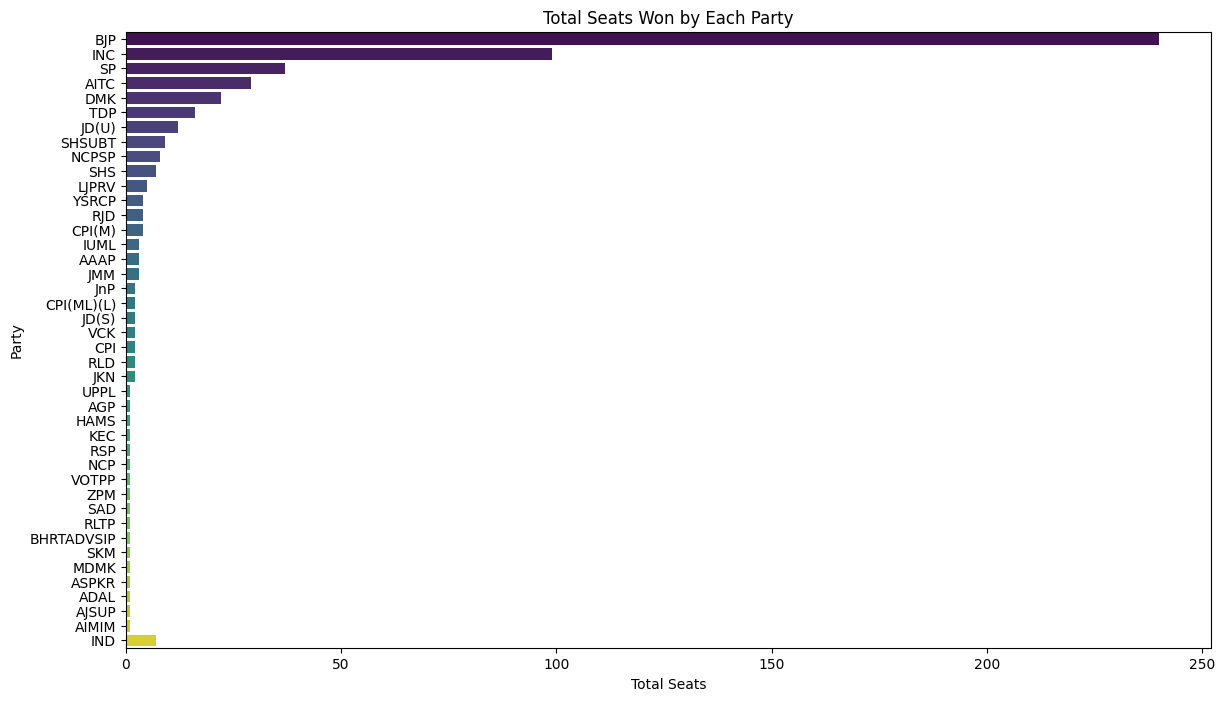

In [4]:
# Plot total seats won by each party
plt.figure(figsize=(14, 8))
sns.barplot(data=df, x='Total', y='Party Abbreviation', palette='viridis')
plt.title('Total Seats Won by Each Party')
plt.xlabel('Total Seats')
plt.ylabel('Party')
plt.show()

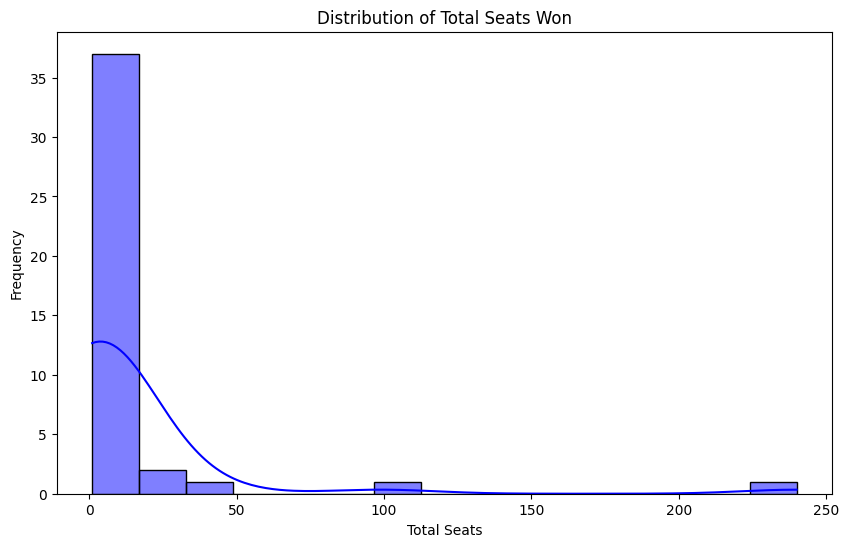

In [5]:
# Plot distribution of total seats
plt.figure(figsize=(10, 6))
sns.histplot(df['Total'], bins=15, kde=True, color='blue')
plt.title('Distribution of Total Seats Won')
plt.xlabel('Total Seats')
plt.ylabel('Frequency')
plt.show()

C:\Users\annar\AppData\Local\Temp\ipykernel_25284\817601516.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_5_parties, x='Total', y='Party Abbreviation', palette='muted')


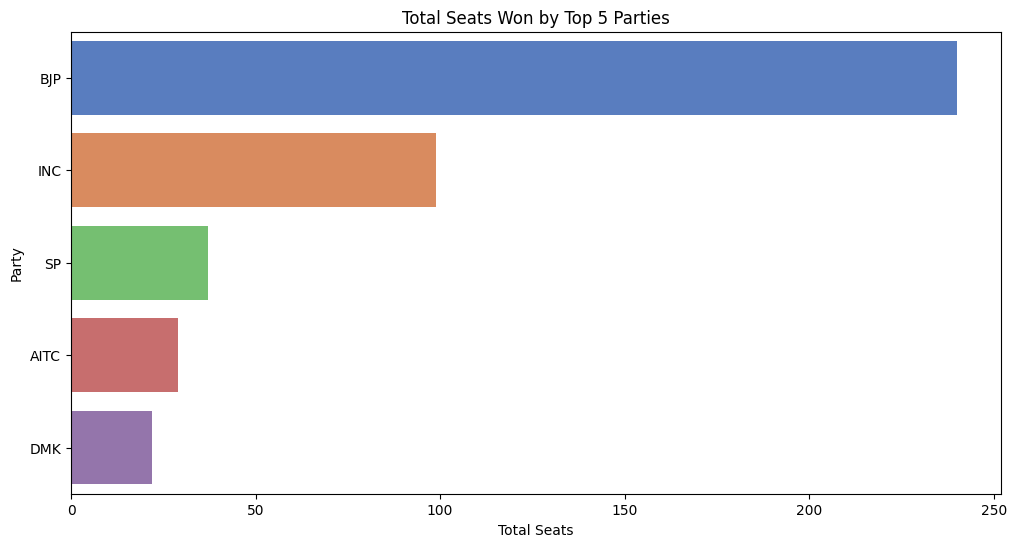

In [6]:
# Get top 5 parties by total seats
top_5_parties = df.nlargest(5, 'Total')

# Plot total seats of top 5 parties
plt.figure(figsize=(12, 6))
sns.barplot(data=top_5_parties, x='Total', y='Party Abbreviation', palette='muted')
plt.title('Total Seats Won by Top 5 Parties')
plt.xlabel('Total Seats')
plt.ylabel('Party')
plt.show()

In [7]:
# Summary statistics
summary = df.describe()

# Top 5 parties
top_5_summary = top_5_parties[['Party', 'Party Abbreviation', 'Total']]

print("Summary Statistics:")
print(summary)

print("\nTop 5 Parties by Total Seats:")
print(top_5_summary)

# Save summary and top 5 parties to CSV files
summary.to_csv('./data/summary_statistics.csv')
top_5_summary.to_csv('./data/top_5_parties.csv')

print("Summary statistics and top 5 parties have been saved to CSV files.")

Summary Statistics:
              Won  Leading       Total
count   42.000000     42.0   42.000000
mean    12.928571      0.0   12.928571
std     39.466808      0.0   39.466808
min      1.000000      0.0    1.000000
25%      1.000000      0.0    1.000000
50%      2.000000      0.0    2.000000
75%      6.500000      0.0    6.500000
max    240.000000      0.0  240.000000

Top 5 Parties by Total Seats:
                                 Party Party Abbreviation  Total
0         Bharatiya Janata Party - BJP                BJP    240
1       Indian National Congress - INC                INC     99
2                 Samajwadi Party - SP                 SP     37
3  All India Trinamool Congress - AITC               AITC     29
4      Dravida Munnetra Kazhagam - DMK                DMK     22
Summary statistics and top 5 parties have been saved to CSV files.


BJP has 240 seats, more than double of INC's 99 seats.
SP and AITC have strong regional influence with 37 and 29 seats respectively.
DMK and TDP show political significance with 22 and 16 seats each.
Shiv Sena split: SHSUBT has 9 seats, SHS has 7 seats.
LJPRV and NCPSP have 5 and 8 seats, influencing outcomes despite limited reach.
CPI(M) and CPI have 4 and 2 seats, maintaining left-wing presence.
Independent candidates secured 7 seats, indicating voter discontent with traditional parties.
Diverse landscape with 42 different political ideologies represented.
Single seat parties include: UPPL, AGP, HAMS, KEC, RSP, NCP, VOTPP, ZPM, SAD, RLTP, BHRTADVSIP, SKM, MDMK, ASPKR, ADAL, AJSUP, AIMIM.
RJD and RLD won 4 and 2 seats, highlighting the importance of caste dynamics.
